## 라이브러리 로드
참고 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 결측치 확인

In [3]:
# 결측치 합계
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 결측치 제거

In [4]:
# dropna로 결측치 제거
df = df.dropna()
df.shape

(392, 9)

## 수치데이터만 가져오기

In [5]:
# select_dtypes를 통해 object타입을 제외(exclude)하고 가져옴
# object type column : 2개
df = df.select_dtypes(exclude="object")
df.shape

(392, 7)

## 전체데이터의 기술 통계 확인

In [6]:
#  describe 이용하여 전체 기술 통계 가져오기 
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 데이터셋 나누기

In [7]:
# 전체 데이터프레임에서 df, train, test를 분리
# 학습 후 실제 예측을 해보는 과정을 거침.
# train_dataset : 학습에 사용() - Modeling(Training Data)
# test_dataset : 실제 예측에 사용 - Prediction
train_dataset = df.sample(frac=0.8, random_state=42)
train_dataset.shape

(314, 7)

In [8]:
# train_dataset과 test_dataset이 겹치면 안 되므로 train_dataset의 index의 값들을 제거함
test_dataset = df.drop(train_dataset.index)
test_dataset.shape

(78, 7)

In [9]:
# train_dataset, test_dataset에서 label(정답) 값을 꺼내 label로 따로 생성
# 문제에서 정답을 분리하는 과정 
# train_labels : train_dataset에서 정답을 꺼내 분리 - Modeling(Training Labels)
# test_labels : test_dataset에서 정답을 꺼내 분리 - Evaluation 
train_labels = train_dataset.pop("mpg")
train_labels.shape

(314,)

In [10]:
test_labels = test_dataset.pop("mpg")
test_labels.shape

(78,)

In [11]:
train_dataset.shape, test_dataset.shape

((314, 6), (78, 6))

## 딥러닝 모델 만들기

In [12]:
import tensorflow as tf
tf.__version__

'2.7.0'

## 딥러닝 층(layer) 구성

In [13]:
model = tf.keras.Sequential()

# input layer(입력층)
# Optionally, the first layer can receive an `input_shape` argument:
model.add(tf.keras.layers.Dense(64, input_shape=[len(train_dataset.keys())]))

# hidden layer(은닉층)
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(64))

# output layer(출력층)
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(1))

## 모델 컴파일

In [14]:
# loss(손실함수) : 값을 예측하려할 때 데이터에 대한 예측값과 실제의 값을 비교하는 함수(Training시 사용할 함수 지정)
# metrics : 모델의 정확도를 측정하는 방법 지정 (평가(Evaluation)시 사용할 함수 지정)(회귀모델 : mae, mse, rnse를 주로 사용)
model.compile(loss="mse", metrics=["mae", "mse"])

## 만든 모델 확인하기

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 모델로 학습하기

In [16]:
# epochs : 몇 번을 반복하여 학습할 것인지 지정
# verbose : 로그를 어떻게 얼마나 찍을 것인지 지정
model.fit(train_dataset, train_labels, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 252889.9375 - mae: 171.6240 - mse: 252889.9375
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 84.4909 - mae: 7.3443 - mse: 84.4909
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 57935.8398 - mae: 195.7542 - mse: 57935.8398
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 20651.4609 - mae: 124.7938 - mse: 20651.4629
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 41233.6172 - mae: 159.5667 - mse: 41233.6172
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 41499.8945 - mae: 177.7431 - mse: 41499.8945
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 6806.4077 - mae: 75.8200 - mse: 6806.4077
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 29729.7207 - mae: 152.8880 - mse: 29729.7207
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 2

## 딥러닝 모델로 평가하기

In [17]:
model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 3788.3306 - mae: 56.7924 - mse: 3788.3306


[3788.33056640625, 56.79239273071289, 3788.33056640625]

## 딥러닝 모델로 예측하기

In [18]:
predict_labels = model.predict(test_dataset).flatten()
predict_labels[:5]

array([87.96409 , 54.919228, 82.87992 , 73.68674 , 90.0288  ],
      dtype=float32)

## 딥러닝 모델의 예측결과 평가하기

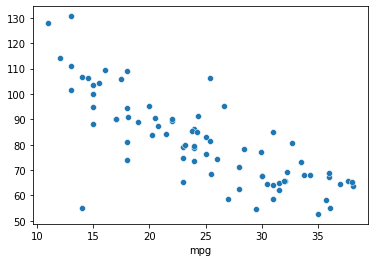

In [19]:
sns.scatterplot(x=test_labels, y=predict_labels)

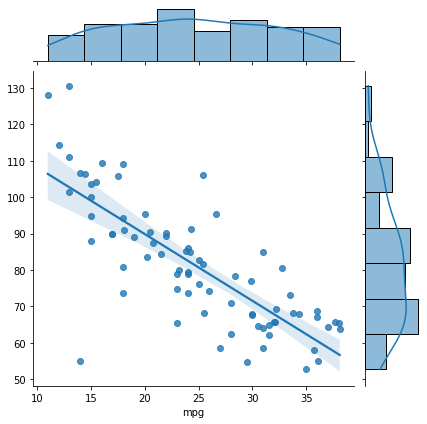

In [20]:
sns.jointplot(x=test_labels, y=predict_labels, kind="reg")